<div align="center"><h1> Project Finance: Python for trading </h1></div>
<div align="center"><h3> BFA Banque - Finance - Assurance Dauphine University </h3></div>

-------------------------------------------------------------------------------------------------------------------------------

#### L'enseignant: VINCENT GAUTHIER
Vincent.gauthier@telecom-sudparis.eu

#### Membres de groupe:
1. Thanh Tu NGUYEN
2. Liuhui TU
3. Yuyan GAN
4. Paul LEGREZ


### 1. Problème

- Période de simulation:  ** 01-01-2016 -> 31-12-2016   **
- Liste des actions simulées: **14** actions de **S&P500**     



|  AAPL |  GOOG |  AMZN |  AXP | BAC  |BA |KO | FB|IBM |GE |GS | HP| XOM| F |
|---|:---:|---|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|Apple	|Google|	Amazon|	American Express Company	|Bank of America	|Boeing	|Coca-cola	|Facebook	|IBM	|General Electric	|Goldmans Sachs	|Hp	|Exxon Mobil	|Ford

#### Problème:    
- Créer des stratégies du trading

### 2. Maximiser ratio de notre portefeuille

#### 2.1 Les statistiques des actions de portefeuille

In [1]:
import pandas as pd
from utils.utils import get_data_frame
from utils.get_stats import get_stocks_stas
start_date = '2016-01-01'
end_date = '2017-09-01'
list_stocks = ['AAPL','GOOG','AMZN','AXP','BAC','BA','KO','FB','IBM','GE', 'GS','HP', 'XOM', 'F','SPY']

list_stat = []
for i in range(len(list_stocks)):
    stock = list_stocks[i]
    data_col = get_data_frame(stock, start_date, end_date, dropna= True)
    stas = get_stocks_stas(data_col, start_date, end_date)
    list_stat.append(stas)

columns = ["avg_daily_return", "std_daily_return", "beta", "alpha", "momentum", "infor_ratio", "sharpe_ratio"]
df_stats = pd.DataFrame(list_stat, index = list_stocks, columns = columns).iloc[:-1,:]
df_stats.sort_values(by = 'sharpe_ratio', ascending= False)

,avg_daily_return,std_daily_return,beta,alpha,momentum,infor_ratio,sharpe_ratio
BA,0.00150684,0.013853,0.295811,0.00133072,0.011532,1.04446,1.72674
AAPL,0.00122628,0.0133827,0.289040,0.00105419,0.019261,0.748361,1.45461
FB,0.00135202,0.0151453,0.234858,0.00121219,0.011882,0.793063,1.41712
AMZN,0.0011449,0.0157173,0.210731,0.00101943,0.000072,0.555007,1.15635
BAC,0.00113847,0.0180383,0.267361,0.000979292,0.000960,0.47794,1.00191
AXP,0.000739633,0.0131531,0.242301,0.00059537,-0.014304,0.17409,0.892664
GOOG,0.000623103,0.0114783,0.366360,0.000404976,0.011198,0.0383306,0.861755
GS,0.000756186,0.0153683,0.317636,0.00056707,0.004616,0.166095,0.781093
KO,0.0003286,0.00765525,0.413918,8.21586e-05,-0.009091,-0.55323,0.68141
IBM,0.000355814,0.0110726,0.345374,0.000150183,0.011088,-0.343469,0.510122


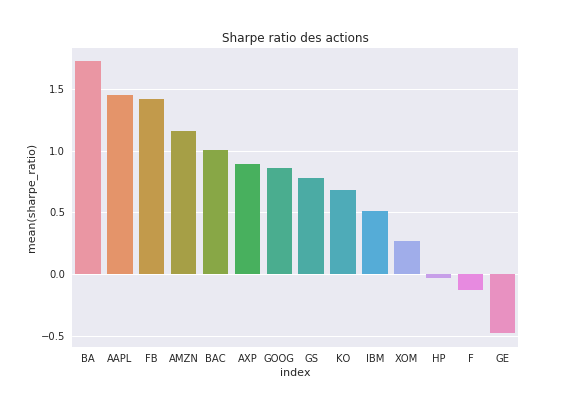

In [2]:
from IPython.display import Image
Image('figure/sharpe_ratio_actions.png')

#### 2.2 Maximise le sharpe ratio pour optimiser la performance en minimisant le risque de portefeuille 

On va calculer l'allocation de notre portefeuille par maximiser le ratio de sharpe 

$$ \text{Ratio de Sharpe} = \frac{(\text{Rentabilité de portefeuille} - \text{Taux sans risque})}{\text{Ecart-type de portefeuille}} $$


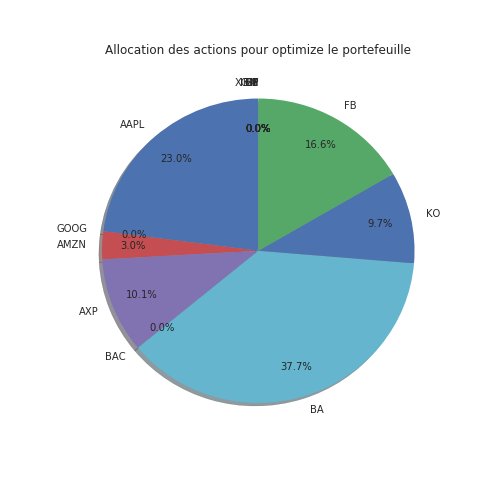

In [6]:
Image('figure/allocation.png', width= 450, height= 100)

##### Surperformance de l'indice avec l'allocation adjustée

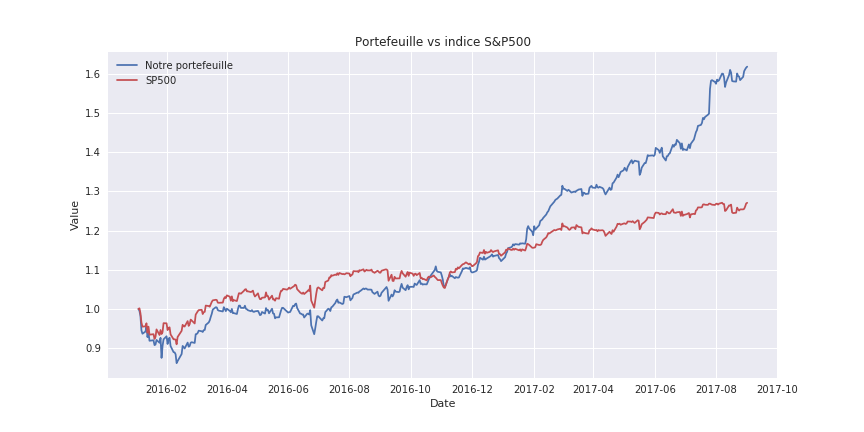

In [4]:
Image('figure/performace_alloc.png', width= 800)

### 3. Stratégie d'investissement pour trading

### Stratégie 1: Bollinger stratégie

##### Principe:   

-  Si le prix d’action est inférieur au **lower band** en j-1 et est supérieur au **lower band** aujourd’hui, alors on long cette action. On reste dans la position longue jusqu’au moment qu’on croise le courbe **« rolling mean »**. Dans ce cas-là, on va sortir la position (c.à.d. on va vendre ce qu’on long).

    
-  Si le prix d’action est supérieur **upper band** en j-1 et est inférieur au **upper band** aujourd’hui, alors on short cette action. On reste dans la position short jusqu’au moment qu’on croise le courbe **« rolling mean »**. Dans ce cas-là, on va sortir la position (c.à.d. on va vendre le short).


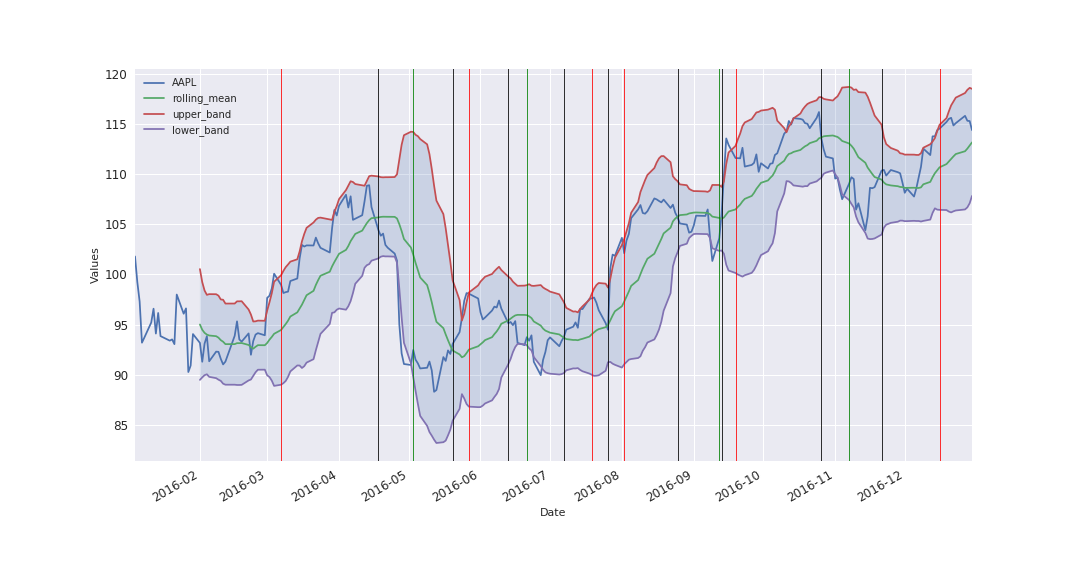

In [5]:
Image("figure/strategy1/AAPL.png", width= 800, height= 300)

Sur le graphique, des lignes verticales sont utilisées pour marquer les changements de stratégie. 
Chaque couleur a une signification :    
- **<font color='green'>vert</font>**  -> on long l’action correspondante ; 
- **<font color='red'>rouge</font>** -> on short l’action correspondante ; 
- **<font color='black'>noir</font>** -> sortir de la position actuelle.   

**Attention** : Concernant le volume de long/short, pour simplifier le modèle, on fixe le volume d’achat/vente à 100 unités d’action. 

### Stratégie 2: Bollinger stratégie adjustée avec momentum

##### Principe: 
- On garde le principe de Stratégie 1
- Mais si le momentum (5 jours) du prix de l'action est supérieur à 0.25 et la différence de **ratio bollinger** entre prix l'action aujoud'hui et celui de l'indice est inférieur à -0.3, on va long cette action
- Mais si le momentum (5 jours) du prix de l'action est inférieur à 0.25 et la différence de **ratio bollinger** entre prix l'action aujoud'hui et celui de l'indice est supérieur à 0.3, on va short cette action

#### Ration Bollinger

$$ \text{ Ratio Bollinger} = \frac{(\text{Prix de l'action} - \text{rolling mean})}{(\text{upper band} - \text{lower band})} $$

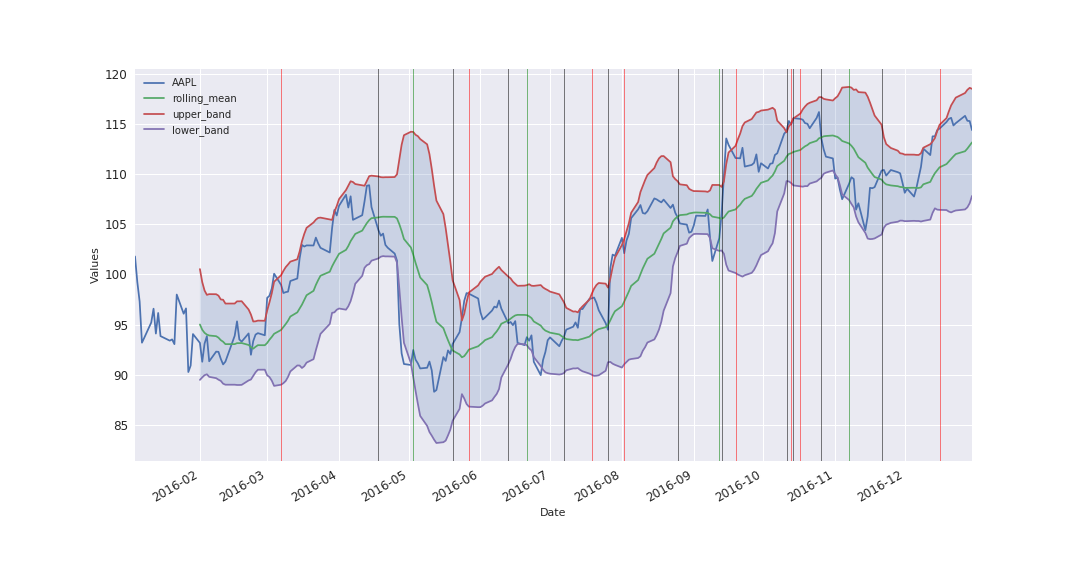

In [6]:
Image("figure/strategy2/AAPL.png", width= 800, height= 250)

### 4. Back Testing

### Stratégie 1:

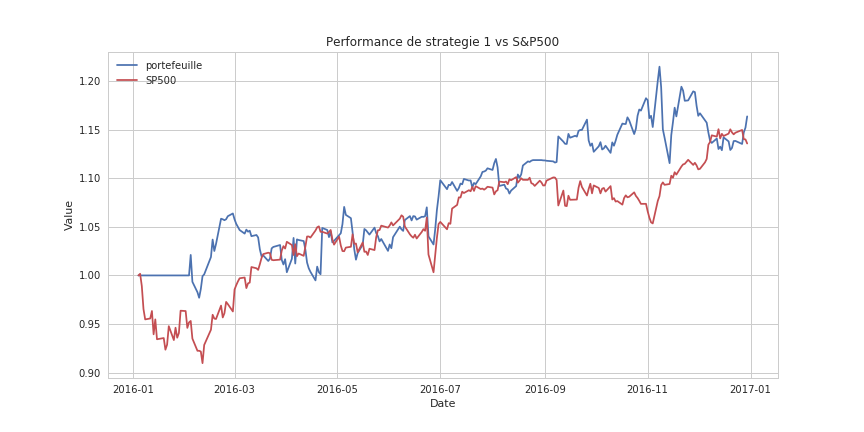

In [7]:
Image('figure/strategy1/perf_st1.png', width= 700, height= 200)

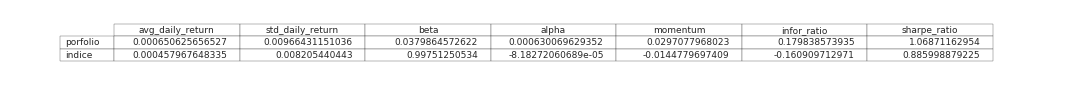

In [28]:
Image('figure/strategy1/stas_strategy1_vs_indice.png', width= 1500)

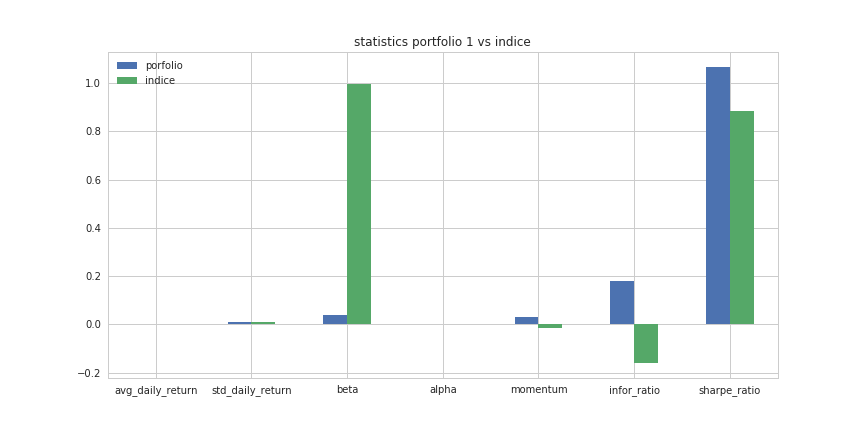

In [41]:
Image('figure/strategy1/statistics_portfolio_1_vs_indice_graph.png', width= 700)

### Conclusion:
- **Rentabilité** de stratégie 1: **16.37%**
- Cette strategie surperforme l'indice S&P500

### Stratégie 2:

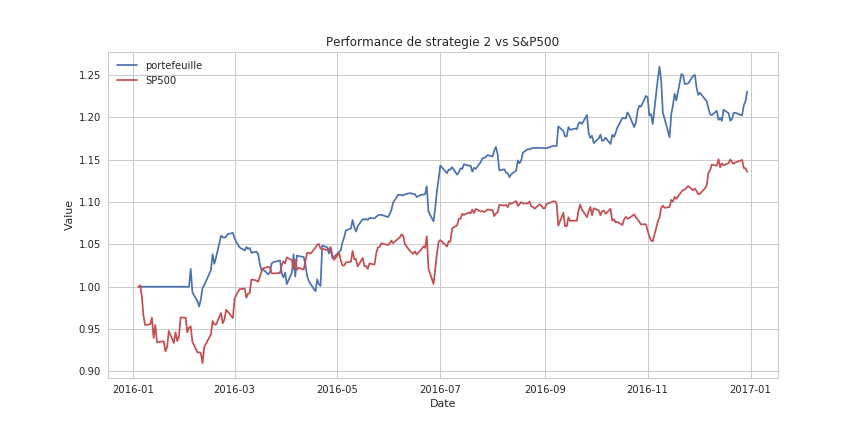

In [37]:
Image('figure/strategy2/perf_st2.png', width= 700, height= 200)

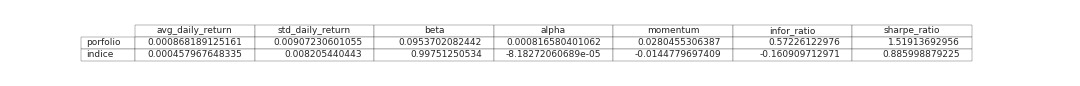

In [29]:
Image('figure/strategy2/stas_strategy2_vs_indice.png', width= 1500)

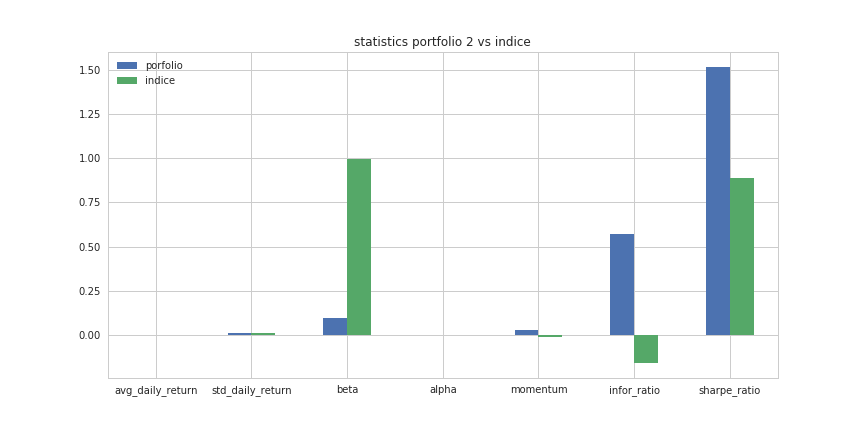

In [40]:
Image('figure/strategy2/statistics_portfolio_2_vs_indice_graph.png', width= 700)

### Conclusion:
- **Rentabilité** de stratégie 2 pour l'année 2016: **23.07%** 
- Cette stratégie surperforme l'indice S&P500

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="hide/display"></form>''')
